In [1]:
import h5py
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from astropy.visualization import ImageNormalize, LogStretch
plt.style.use("science")
params = {'legend.fontsize': 27,
          'figure.figsize': (10, 10),
         'axes.labelsize': 27,
         'axes.titlesize': 30,#'x-large',
         'xtick.labelsize':20,
         'ytick.labelsize':20,
         'figure.titlesize': 40
         }
pylab.rcParams.update(params)

In [2]:
hf = h5py.File(os.path.join(os.getenv('CENSAI_PATH'), "results", "k50_vae_ranking_220111.h5"), "r")
hf.keys()

<KeysViewHDF5 ['sample_00', 'sample_01', 'sample_02', 'sample_03', 'sample_04']>

In [3]:
hf["sample_00"].keys()

<KeysViewHDF5 ['matched_kappa', 'matched_noise_rms', 'matched_obs', 'matched_psf', 'matched_source', 'obs_L2_distance', 'vae_kappa', 'vae_obs', 'vae_psf', 'vae_source']>

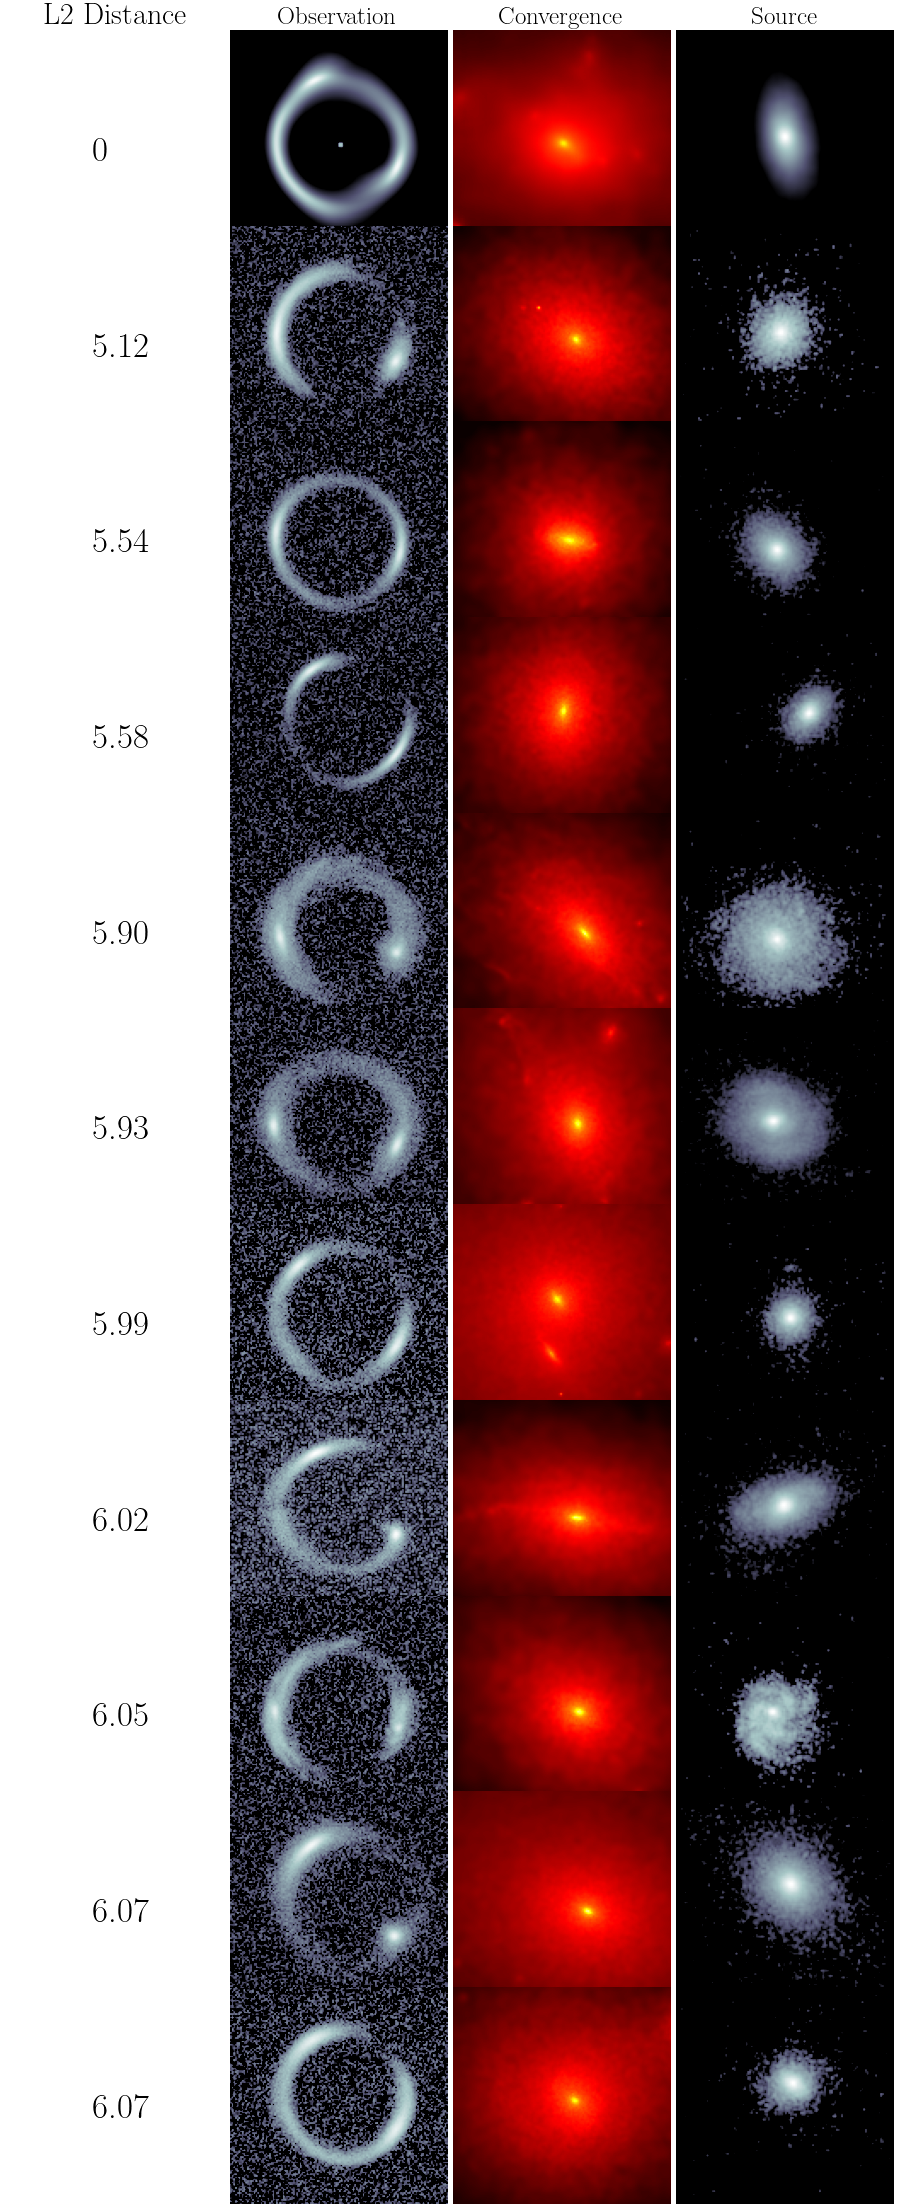

In [35]:
fig, axs = plt.subplots(11, 4, figsize=(16, 40))
sample = 4


axs[0, 1].imshow(hf[f"sample_{sample:02d}"]["vae_obs"], cmap="bone", norm=ImageNormalize(stretch=LogStretch(), vmax=1, vmin=1e-3), origin="lower")
axs[0, 1].set_title("Observation", fontsize=25)
axs[0, 2].imshow(hf[f"sample_{sample:02d}"]["vae_kappa"], cmap="hot", norm=ImageNormalize(stretch=LogStretch(), vmax=100, vmin=1e-1), origin="lower")
axs[0, 2].set_title("Convergence", fontsize=25)
axs[0, 3].imshow(hf[f"sample_{sample:02d}"]["vae_source"], cmap="bone", norm=ImageNormalize(stretch=LogStretch(), vmax=1, vmin=1e-3), origin="lower")
axs[0, 3].set_title("Source", fontsize=25)
axs[0, 0].annotate("0", xy=(0.4, 0.4), xycoords="axes fraction", fontsize=35)
axs[0, 0].set_title("L2 Distance")

for i in range(10):
    axs[i+1, 1].imshow(hf[f"sample_{sample:02d}"]["matched_obs"][i],    cmap="bone", norm=ImageNormalize(stretch=LogStretch(), vmax=1, vmin=1e-3), origin="lower")
    axs[i+1, 2].imshow(hf[f"sample_{sample:02d}"]["matched_kappa"][i],  cmap="hot",  norm=ImageNormalize(stretch=LogStretch(), vmax=100, vmin=1e-1), origin="lower")
    axs[i+1, 3].imshow(hf[f"sample_{sample:02d}"]["matched_source"][i], cmap="bone", norm=ImageNormalize(stretch=LogStretch(), vmax=1, vmin=1e-3), origin="lower")
#     axs[i+1, 0].annotate(f"k={i+1}", xy=(0.4, 0.6), xycoords="axes fraction", fontsize=35)
    axs[i+1, 0].annotate(f"{hf[f'sample_{sample:02d}']['obs_L2_distance'][i]:.2f}", xy=(0.4, 0.4), xycoords="axes fraction", fontsize=35)

for i in range(11):
    for j in range(4):
        axs[i, j].axis("off")
plt.subplots_adjust(wspace=0, hspace=-0.1)
plt.savefig("knn_ranking.png", facecolor="white")